In [52]:
import pandas as pd
import math
from datetime import datetime
import matplotlib.pyplot as plt

In [30]:
station_df = pd.read_csv('Divvy_Stations_2015.csv')
station_df

,id,name,latitude,longitude,dpcapacity,landmark
0,2,Michigan Ave & Balbo Ave,41.872293,-87.624091,35,541
1,3,Shedd Aquarium,41.867226,-87.615355,31,544
2,4,Burnham Harbor,41.856268,-87.613348,23,545
3,5,State St & Harrison St,41.874053,-87.627716,23,30
4,6,Dusable Harbor,41.885042,-87.612795,31,548
...,...,...,...,...,...,...
469,507,Humboldt Blvd & Armitage Ave,41.917513,-87.701809,19,651
470,508,Central Park Ave & North Ave,41.909657,-87.716632,15,652
471,509,Troy St & North Ave,41.909769,-87.705280,15,653
472,510,Spaulding Ave & Division St,41.902707,-87.709220,15,654


In [31]:
station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          474 non-null    int64  
 1   name        474 non-null    object 
 2   latitude    474 non-null    float64
 3   longitude   474 non-null    float64
 4   dpcapacity  474 non-null    int64  
 5   landmark    474 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 22.3+ KB


In [32]:
station_df.describe()

,id,latitude,longitude,dpcapacity,landmark
count,474.000000,474.000000,474.000000,474.000000,474.000000
mean,258.331224,41.891624,-87.651595,17.455696,331.529536
std,147.676701,0.056868,0.033354,5.192198,211.795626
min,2.000000,41.757120,-87.732370,11.000000,1.000000
25%,132.250000,41.857684,-87.674333,15.000000,145.250000
50%,257.500000,41.891767,-87.649341,15.000000,303.500000
75%,387.500000,41.932152,-87.629757,19.000000,530.750000
max,511.000000,42.012560,-87.549386,43.000000,695.000000


In [33]:
trips_df = pd.read_csv('Divvy_Trips_2015-Q1.csv')
trips_df.head(5)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,4738454,3/31/2015 23:58,4/1/2015 0:03,1095,299,117,Wilton Ave & Belmont Ave,300,Broadway & Barry Ave,Subscriber,Male,1994.0
1,4738450,3/31/2015 23:59,4/1/2015 0:15,537,940,43,Michigan Ave & Washington St,85,Michigan Ave & Oak St,Customer,NaN,NaN
2,4738449,3/31/2015 23:59,4/1/2015 0:11,2350,751,162,Damen Ave & Wellington Ave,67,Sheffield Ave & Fullerton Ave,Subscriber,Male,1992.0
3,4738448,3/31/2015 23:59,4/1/2015 0:19,938,1240,51,Clark St & Randolph St,59,Wabash Ave & Roosevelt Rd,Customer,NaN,NaN
4,4738445,3/31/2015 23:54,4/1/2015 0:15,379,1292,134,Peoria St & Jackson Blvd,216,California Ave & Division St,Subscriber,Male,1976.0


In [34]:
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202349 entries, 0 to 202348
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            202349 non-null  int64  
 1   starttime          202349 non-null  object 
 2   stoptime           202349 non-null  object 
 3   bikeid             202349 non-null  int64  
 4   tripduration       202349 non-null  int64  
 5   from_station_id    202349 non-null  int64  
 6   from_station_name  202349 non-null  object 
 7   to_station_id      202349 non-null  int64  
 8   to_station_name    202349 non-null  object 
 9   usertype           202349 non-null  object 
 10  gender             177858 non-null  object 
 11  birthyear          177858 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 18.5+ MB


In [35]:
trips_df.describe(include='all')

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
count,2.023490e+05,202349,202349,202349.000000,202349.000000,202349.000000,202349,202349.000000,202349,202349,177858,177858.000000
unique,NaN,68570,68525,NaN,NaN,NaN,300,NaN,300,3,2,NaN
top,NaN,3/16/2015 17:10,3/16/2015 17:56,NaN,NaN,NaN,Clinton St & Washington Blvd,NaN,Clinton St & Washington Blvd,Subscriber,Male,NaN
freq,NaN,37,31,NaN,NaN,NaN,5031,NaN,5481,177834,144673,NaN
mean,4.572141e+06,NaN,NaN,1534.910941,785.447667,161.529906,NaN,161.420481,NaN,NaN,NaN,1977.813745
std,9.169026e+04,NaN,NaN,872.050742,2068.399468,99.176910,NaN,99.805083,NaN,NaN,NaN,10.724572
min,4.413169e+06,NaN,NaN,1.000000,60.000000,5.000000,NaN,5.000000,NaN,NaN,NaN,1900.000000
25%,4.490455e+06,NaN,NaN,774.000000,334.000000,74.000000,NaN,73.000000,NaN,NaN,NaN,1971.000000
50%,4.574512e+06,NaN,NaN,1547.000000,542.000000,153.000000,NaN,152.000000,NaN,NaN,NaN,1981.000000
75%,4.648195e+06,NaN,NaN,2293.000000,890.000000,243.000000,NaN,244.000000,NaN,NaN,NaN,1986.000000


In [36]:
trips_df.isnull().values.any()

np.True_

In [37]:
trips_df.gender= trips_df.gender.fillna('Unknown')

In [57]:
gender_counts = trips_df.groupby("gender").size()
gender_counts

gender
Female      33185
Male       144673
Unknown     24491
dtype: int64

In [38]:
birth_year_mean = math.floor(trips_df.birthyear.mean())
birth_year_mean

1977

In [40]:
trips_df.birthyear = trips_df.birthyear.fillna(birth_year_mean)

In [42]:
trips_df.birthyear.isnull().values.any()

np.False_

In [50]:
trips_df['starttime'] = pd.to_datetime(trips_df.starttime)
trips_df['stoptime'] = pd.to_datetime(trips_df.stoptime)

In [51]:
trips_df. head(10)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,4738454,2015-03-31 23:58:00,2015-04-01 00:03:00,1095,299,117,Wilton Ave & Belmont Ave,300,Broadway & Barry Ave,Subscriber,Male,1994.0
1,4738450,2015-03-31 23:59:00,2015-04-01 00:15:00,537,940,43,Michigan Ave & Washington St,85,Michigan Ave & Oak St,Customer,Unknown,1977.0
2,4738449,2015-03-31 23:59:00,2015-04-01 00:11:00,2350,751,162,Damen Ave & Wellington Ave,67,Sheffield Ave & Fullerton Ave,Subscriber,Male,1992.0
3,4738448,2015-03-31 23:59:00,2015-04-01 00:19:00,938,1240,51,Clark St & Randolph St,59,Wabash Ave & Roosevelt Rd,Customer,Unknown,1977.0
4,4738445,2015-03-31 23:54:00,2015-04-01 00:15:00,379,1292,134,Peoria St & Jackson Blvd,216,California Ave & Division St,Subscriber,Male,1976.0
5,4738443,2015-03-31 23:53:00,2015-03-31 23:56:00,2045,175,296,Broadway & Belmont Ave,117,Wilton Ave & Belmont Ave,Subscriber,Male,1992.0
6,4738439,2015-03-31 23:49:00,2015-04-01 00:05:00,227,930,327,Sheffield Ave & Webster Ave,291,Wells St & Evergreen Ave,Subscriber,Male,1989.0
7,4738436,2015-03-31 23:46:00,2015-03-31 23:52:00,2969,383,115,Sheffield Ave & Wellington Ave,157,Lake Shore Dr & Wellington Ave,Subscriber,Male,1987.0
8,4738431,2015-03-31 23:42:00,2015-03-31 23:47:00,68,260,117,Wilton Ave & Belmont Ave,299,Halsted St & Roscoe St,Subscriber,Male,1990.0
9,4738428,2015-03-31 23:35:00,2015-03-31 23:54:00,938,1123,53,Wells St & Erie St,51,Clark St & Randolph St,Customer,Unknown,1977.0


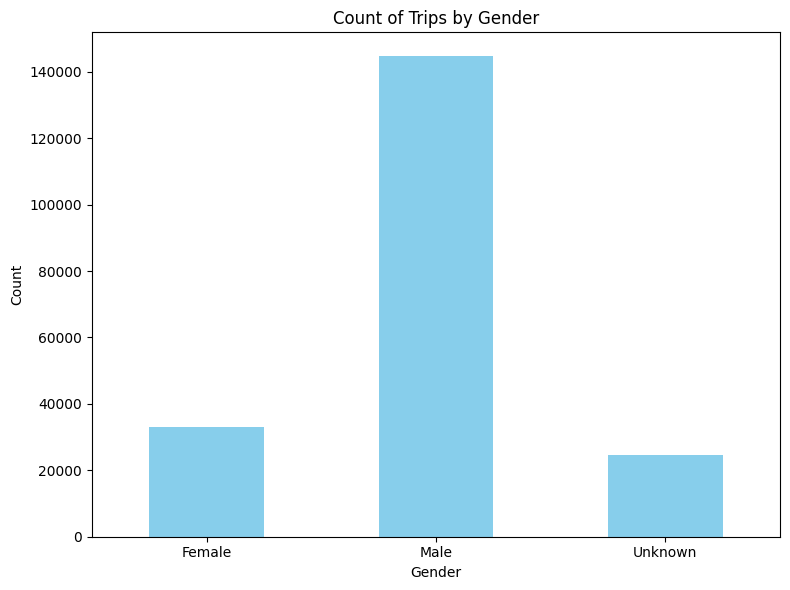

In [62]:
gender_counts.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title("Count of Trips by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Ensure labels are horizontal
plt.tight_layout()